# 01. Introduction and Normal Distributions

## Introduction

**Welcome!**

This repository is designed to supplement ISTD 50.034 (Introduction to Probability and Statistics) with some nice visualisations and code things to play with. It does not, and is not intended to, cover all the subject areas of 50.034.

Most of the code here will utilise the TensorFlow Probability library. If you're viewing the Notebook on Colab, there's nothing you have to worry about! Everything you need is already configured.

First, we'll import TensorFlow and TensorFlow Probability

In [0]:
import tensorflow as tf
print("TensorFlow\t\t", ":", tf.__version__)

# Enable Eager Execution (default in TF2)
# Read more here: https://www.tensorflow.org/guide/eager

try:
    tf.enable_eager_execution()
    print("Enabled eager execution")
except Exception as e:
    print(e)
    print("Eager execution:", tf.executing_eagerly() )

TensorFlow		 : 1.13.1
Enabled eager execution


In [0]:
# check which devices you have
# CPU works fine for the notebooks in the repository
# but if we're on Colab, the free GPU is nice to have

from tensorflow.python.client import device_lib

local_device_protos = device_lib.list_local_devices()

print("Devices:")
print([x.name for x in local_device_protos])

Devices:
['/device:CPU:0', '/device:XLA_CPU:0', '/device:XLA_GPU:0', '/device:GPU:0']


In [0]:
import tensorflow_probability as tfp

tfd = tfp.distributions
tfb = tfp.bijectors

print("TensorFlow Probability\t", ":", tfp.__version__)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

TensorFlow Probability	 : 0.6.0


Next, we'll import some typical Python data science libraries that will make our lives easier:

In [0]:
import numpy as np
import os

matplotlib_style = "ggplot"
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
import matplotlib.axes as axes;
from matplotlib.patches import Ellipse
%matplotlib inline

from IPython.core.pylabtools import figsize
notebook_screen_res = "retina"
%config InlineBackend.figure_format = notebook_screen_res

## Normal Distribution


A continuous RV X is called Gaussian or **normal** if its pdf is given by: 

$f(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

for some parameters $\mu$ and $\sigma$ satisfying $−∞ < µ < ∞$ and $σ > 0$ .

* $X$ is the normal RV with parameters $µ$ and $σ$
* A **normal distribution** is the distribution of a normal RV.
* Its graph is called a bell curve and symmetrical about $x = \mu$
* Expectation **E**[$X$] = $\mu$
* Variance var($X$) = $\sigma^2$
* $X$ has the normal distribution with mean $\mu$ and variance $\sigma^2$

Given $X ∼ N(\mu, \sigma^2)$:

$Z = \frac{X-\mu}{\sigma}$ has the normal distribution with $\mu=0$ and $\sigma=1$ :

Standard Normal Distribution : $Z ∼ N(0, 1)$

**Applications**

The most widely used probability distribution is called the Gaussian distribution, or also called the **normal distribution**.

This is because many real-world RV are approximately normal given a large enough sample size.

* Suppose we take a **large random sample** from **any distribution** (continuous, discrete, or mixed) with **ﬁnite mean and variance**.
* Even if the distribution is not close to a normal distribution, it is a fascinating fact that the **sample mean would always approximately follow a normal distribution**.

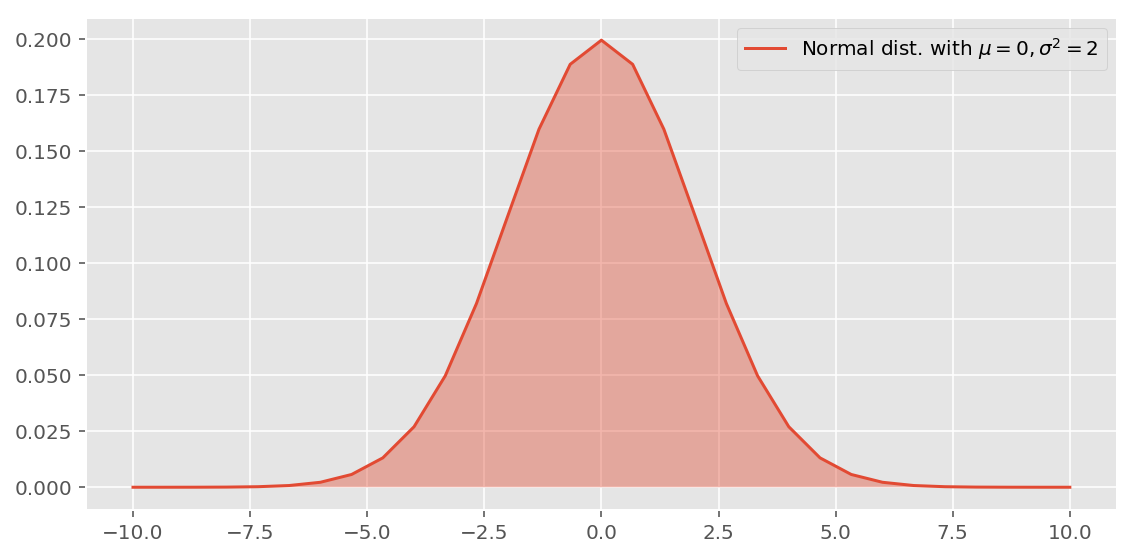

In [0]:
#@title Normal distribution parameters { run: "auto" }
𝜇 = 0 #@param {type:"slider", min:-10, max:10, step:1}
𝜎2 = 2 #@param {type:"slider", min:0, max:10, step:0.05}

n = 10
space = tf.linspace(start=-1.*n, stop=n, num=n*3+1, name="linspace")

normal = tfd.Normal(loc=𝜇, scale=𝜎2)
normal_values = normal.prob(space[:, tf.newaxis])
normal_values = tf.transpose(normal_values)

# convert to numpy array
normal_values = normal_values.numpy().reshape((n*3+1))

label_string = r"Normal dist. with $\mu="+str(𝜇)+", \sigma^2="+str(𝜎2)+"$"

plt.figure(figsize(8, 4))
plt.plot(space,
         normal_values,
         label=label_string)
plt.fill_between(space, 0, normal_values, alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

## References

1. Lecture 10, Introduction to Probability and Statistics, 50.034 (2018), Singapore University of Technology and Design
2. TensorFlow Probability - [Distributions Intro](https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/TensorFlow_Distributions_Tutorial.ipynb)

